# **Import Libraries and modules**

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from google.colab.patches import cv2_imshow

Using TensorFlow backend.


# GRADCAM

Let's start with a pretrained VGG model

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
import keras.backend as K

1.  Loading helper functions
2.  Load VGG
3. Load Image
4. Rescale image to 224x224x3 (VGG's expectation, why?)
5. Use expand_dims to convert image to a batch of size 1
6. Preprocesing normalizes our input image by subtracting mean RGB values

In [3]:
model = VGG16(weights="imagenet")
from skimage import io
dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")
dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

W0721 16:02:13.420294 140388206368640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 16:02:13.440071 140388206368640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 16:02:13.444088 140388206368640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 16:02:13.478346 140388206368640 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0721 16:02:15.314669 140388206368640 deprecation_wrapp

1.	We get the predictions for the image

2.	We take the topmost class index

3.	Take output from the final convolutional layer

4.	Compute the gradient of the class output value with respect to the feature map

5.	Pool the gradients over all the axies leaving out the channel dimension

6.	Weigh the output feature map with the computed gradient values

7.	Average the weighted feature map along the channel dimension resulting in a heat map of size 14x14 

8.	Normalize the heat map to make the values between 0 and  1





Show the results

In [0]:
def display_image(layer):
     preds = model.predict(x)
     class_idx = np.argmax(preds[0])
     ##print(class_idx)
     class_output = model.output[:, class_idx]
     last_conv_layer = model.get_layer(layer)
     grads = K.gradients(class_output, last_conv_layer.output)[0]
     ##print(grads.shape)
     pooled_grads = K.mean(grads, axis=(0, 1, 2))
     ##print(pooled_grads.shape)
     iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
     pooled_grads_value, conv_layer_output_value = iterate([x])
     for i in range(512):
           conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
     heatmap = np.mean(conv_layer_output_value, axis = -1)
     ##print(conv_layer_output_value.shape)
     ##print(heatmap.shape)
     heatmap = np.maximum(heatmap, 0)
     heatmap /= np.max(heatmap)
     heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
     heatmap = np.uint8(255 * heatmap)
     heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
     superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
     from google.colab.patches import cv2_imshow
     cv2_imshow( dog)
     cv2_imshow(superimposed_img)

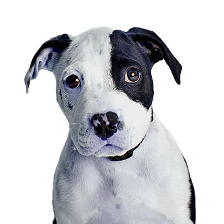

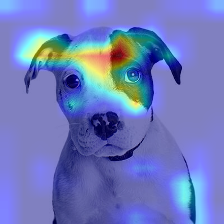

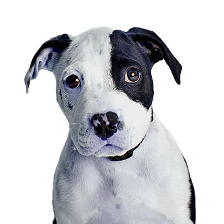

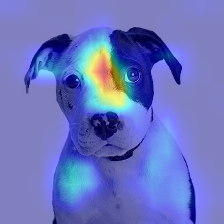

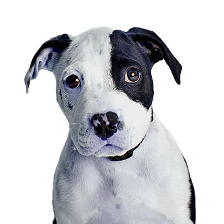

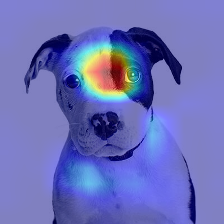

In [5]:
display_image("block5_conv1")
display_image("block5_conv2")
display_image("block5_conv3")


In [0]:
def display_layer_new(layer,classindex,bomma):
      tony = bomma
      x = np.expand_dims(image.img_to_array(tony), axis=0)
      class_idx = classindex
      class_idx = np.argmax(class_idx, axis=0) if type(class_idx)==list or type(class_idx)==np.ndarray else class_idx
      x = preprocess_input(x)
      preds = model.predict(x)
      preds = np.argmax(preds, axis=1)[0]
      class_output = model.output[:, class_idx]
      last_conv_layer = model.get_layer(layer)
      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))
      iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([x])
      for i in range(512):
           conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      heatmap = np.mean(conv_layer_output_value, axis = -1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
      heatmap = cv2.resize(heatmap, (tony.shape[1], tony.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
      superimposed_img = cv2.addWeighted(tony, 0.5, heatmap, 0.5, 0)
      from google.colab.patches import cv2_imshow
      cv2_imshow( tony)
      cv2_imshow(superimposed_img)

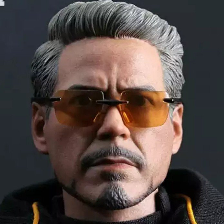

In [14]:
tony = io.imread("https://github.com/faizanahemad/eva/raw/master/assignment-10/rdj_glasses.jpg")
tony = cv2.resize(rdj, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
cv2_imshow(cv2.cvtColor(tony, cv2.COLOR_BGR2RGB))

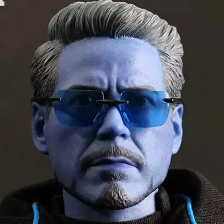

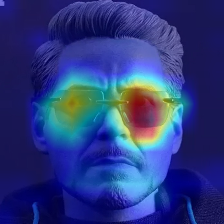

In [19]:
display_layer_new("block5_conv3",837,tony)